In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
df=pd.read_csv('movie.csv')
df

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,16739,16740,The Ghosts of Buxley Hall,1980,NaN,6.2,NaN,0,0,0,1,0,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0
16740,16740,16741,The Poof Point,2001,7+,4.7,NaN,0,0,0,1,0,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0
16741,16741,16742,Sharks of Lost Island,2013,NaN,5.7,NaN,0,0,0,1,0,Neil Gelinas,Documentary,United States,English,NaN
16742,16742,16743,Man Among Cheetahs,2017,NaN,6.6,NaN,0,0,0,1,0,Richard Slater-Jones,Documentary,United States,English,NaN


# data cleaning
* 1st check the missing values if maximum missing values are their then remove it breacauese it does max any sense keeping it
* we checked for the duplicates
* we filled the missing values and in 2 column we used median beacause if we use the mean it will give the avg but in median it will sort the data ti asc to des order and take the middle value
* checked the min max avg so that we can get the value is true or not
* then we removes the column that is invalid 

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       16744 non-null  int64  
 1   ID               16744 non-null  int64  
 2   Title            16744 non-null  object 
 3   Year             16744 non-null  int64  
 4   Age              7354 non-null   object 
 5   IMDb             16173 non-null  float64
 6   Rotten Tomatoes  5158 non-null   object 
 7   Netflix          16744 non-null  int64  
 8   Hulu             16744 non-null  int64  
 9   Prime Video      16744 non-null  int64  
 10  Disney+          16744 non-null  int64  
 11  Type             16744 non-null  int64  
 12  Directors        16018 non-null  object 
 13  Genres           16469 non-null  object 
 14  Country          16309 non-null  object 
 15  Language         16130 non-null  object 
 16  Runtime          16152 non-null  float64
dtypes: float64(2

In [126]:
df.duplicated().any() #their are no duplicates

np.False_

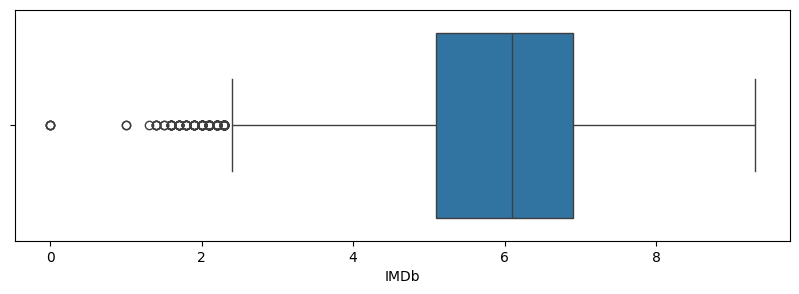

In [127]:
plt.figure(figsize=(10,3))
sns.boxplot(df,x='IMDb')
plt.show()

In [128]:
df['Age']=df['Age'].fillna('Unknown')
df['IMDb']=df['IMDb'].fillna(df['IMDb'].median())
df['Runtime']=df['Runtime'].fillna(df['Runtime'].median())


In [129]:
for col in df.columns[[12,13,14,15]]:
    df[col]=df[col].fillna('Unknown')

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       16744 non-null  int64  
 1   ID               16744 non-null  int64  
 2   Title            16744 non-null  object 
 3   Year             16744 non-null  int64  
 4   Age              16744 non-null  object 
 5   IMDb             16744 non-null  float64
 6   Rotten Tomatoes  5158 non-null   object 
 7   Netflix          16744 non-null  int64  
 8   Hulu             16744 non-null  int64  
 9   Prime Video      16744 non-null  int64  
 10  Disney+          16744 non-null  int64  
 11  Type             16744 non-null  int64  
 12  Directors        16744 non-null  object 
 13  Genres           16744 non-null  object 
 14  Country          16744 non-null  object 
 15  Language         16744 non-null  object 
 16  Runtime          16744 non-null  float64
dtypes: float64(2

In [131]:
df['Rotten Tomatoes']=df['Rotten Tomatoes'].str.strip('%').astype(float)/10

In [132]:
df.loc[df['IMDb'].round(0)==df['Rotten Tomatoes'].round(0)]

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,8.7,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,8.7,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,8.4,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
39,39,40,Ferris Bueller's Day Off,1986,13+,7.8,8.0,1,0,0,0,0,John Hughes,Comedy,United States,"English,German",103.0
40,40,41,Despicable Me,2010,7+,7.6,8.1,1,0,0,0,0,"Pierre Coffin,Chris Renaud","Animation,Comedy,Family,Fantasy","United States,France",English,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16478,16478,16479,Recess: Taking the Fifth Grade,2003,all,6.8,6.7,0,0,0,1,0,Howy Parkins,"Animation,Comedy,Family",United States,English,62.0
16488,16488,16489,Tiger Cruise,2005,7+,6.2,6.0,0,0,0,1,0,Duwayne Dunham,"Drama,Family",United States,English,88.0
16599,16599,16600,Sacred Planet,2004,all,6.1,5.8,0,0,0,1,0,Jon Long,"Documentary,Short","Canada,Malaysia,United States",English,40.0
16618,16618,16619,America's Heart and Soul,2004,7+,5.1,5.0,0,0,0,1,0,Louie Schwartzberg,Documentary,United States,English,84.0


In [133]:
df.columns

Index(['Unnamed: 0', 'ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes',
       'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type', 'Directors',
       'Genres', 'Country', 'Language', 'Runtime'],
      dtype='object')

In [134]:
df['Runtime'].agg(['min','max','mean'])

min        1.000000
max     1256.000000
mean      93.363473
Name: Runtime, dtype: float64

In [135]:
cols=['Unnamed: 0', 'Rotten Tomatoes', 'Type', 'Runtime']
df=df.drop(columns=cols)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           16744 non-null  int64  
 1   Title        16744 non-null  object 
 2   Year         16744 non-null  int64  
 3   Age          16744 non-null  object 
 4   IMDb         16744 non-null  float64
 5   Netflix      16744 non-null  int64  
 6   Hulu         16744 non-null  int64  
 7   Prime Video  16744 non-null  int64  
 8   Disney+      16744 non-null  int64  
 9   Directors    16744 non-null  object 
 10  Genres       16744 non-null  object 
 11  Country      16744 non-null  object 
 12  Language     16744 non-null  object 
dtypes: float64(1), int64(6), object(6)
memory usage: 1.7+ MB


# data Transformation

In [137]:
df=df.sort_values(by='Title')

In [138]:
df['Title']=df['Title'].str.strip("#")
df['Title']=df['Title'].str.strip("I")
df['Title']=df['Title'].str.strip("I")


In [139]:
def fun(val):
    for c in val.upper():
        if not(65<=ord(c)<=90 or ord(c)==32):
            continue
        else:
            return val

df.loc[~df['Title'].apply(fun).isna()]

,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language
15901,15902,"""22"" A film about Veterans, Healthcare and Sui...",2018,Unknown,6.1,0,0,1,0,Unknown,Unknown,Unknown,Unknown
10302,10303,MomSoHard Live,2019,18+,5.2,0,0,1,0,Brian Volk-Weiss,Comedy,United States,English
15142,15143,LoveSwag,2015,13+,5.4,0,0,1,0,Austin Davoren,"Short,Comedy,Drama,Romance",United States,English
3330,3331,Rucker50,2016,Unknown,5.3,1,0,0,0,Robert McCullough Jr.,Documentary,United States,English
2797,2798,Selfie,2014,Unknown,6.1,1,0,0,0,Cristina Jacob,Comedy,Romania,Romanian
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,2234,Öldür Beni Sevgilim,2019,Unknown,4.5,1,0,0,0,Senol Sönmez,"Comedy,Romance",Turkey,Turkish
1815,1816,İncir Reçeli 2,2014,13+,6.1,1,0,0,0,Aytaç Agirlar,"Drama,Romance",Turkey,Turkish
3321,3322,هجولة 2: المهمة الغامضة,2018,Unknown,3.8,1,0,0,0,Unknown,Unknown,Unknown,Unknown
13547,13548,जान तेरे नाम,1992,Unknown,6.0,0,0,1,0,Unknown,Unknown,Unknown,Unknown


In [140]:
df

,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language
15901,15902,"""22"" A film about Veterans, Healthcare and Sui...",2018,Unknown,6.1,0,0,1,0,Unknown,Unknown,Unknown,Unknown
10302,10303,MomSoHard Live,2019,18+,5.2,0,0,1,0,Brian Volk-Weiss,Comedy,United States,English
15142,15143,LoveSwag,2015,13+,5.4,0,0,1,0,Austin Davoren,"Short,Comedy,Drama,Romance",United States,English
3330,3331,Rucker50,2016,Unknown,5.3,1,0,0,0,Robert McCullough Jr.,Documentary,United States,English
2797,2798,Selfie,2014,Unknown,6.1,1,0,0,0,Cristina Jacob,Comedy,Romania,Romanian
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3321,3322,هجولة 2: المهمة الغامضة,2018,Unknown,3.8,1,0,0,0,Unknown,Unknown,Unknown,Unknown
13547,13548,जान तेरे नाम,1992,Unknown,6.0,0,0,1,0,Unknown,Unknown,Unknown,Unknown
3511,3512,​Maj Rati ​​Keteki,2017,Unknown,6.1,1,0,0,0,Santwana Bardoloi,Drama,India,Assamese
1565,1566,审死官,1992,7+,6.9,1,0,1,0,Unknown,Unknown,Unknown,Unknown


In [141]:
df.loc[~df['Title'].str.isalnum()]

,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language
15901,15902,"""22"" A film about Veterans, Healthcare and Sui...",2018,Unknown,6.1,0,0,1,0,Unknown,Unknown,Unknown,Unknown
10302,10303,MomSoHard Live,2019,18+,5.2,0,0,1,0,Brian Volk-Weiss,Comedy,United States,English
2263,2264,cats_the_mewvie,2020,16+,5.2,1,0,0,0,Michael Margolis,Documentary,Canada,English
10827,10828,$100 and a T-Shirt: A Documentary About Zines ...,2004,Unknown,6.3,0,0,1,0,"Joe Biel,Phil Sano",Documentary,United States,English
14757,14758,$elfie Shootout,2016,16+,3.4,0,0,1,0,"Giorgio Daveed,Ron Jackson",Comedy,United States,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,2234,Öldür Beni Sevgilim,2019,Unknown,4.5,1,0,0,0,Senol Sönmez,"Comedy,Romance",Turkey,Turkish
1815,1816,İncir Reçeli 2,2014,13+,6.1,1,0,0,0,Aytaç Agirlar,"Drama,Romance",Turkey,Turkish
3321,3322,هجولة 2: المهمة الغامضة,2018,Unknown,3.8,1,0,0,0,Unknown,Unknown,Unknown,Unknown
13547,13548,जान तेरे नाम,1992,Unknown,6.0,0,0,1,0,Unknown,Unknown,Unknown,Unknown


In [142]:
df['Title']=df['Title'].str.replace('[^A-Za-z0-9,]','',regex=True)

In [143]:
c1=df['Title'].isin(['',' '])
c2=df['Title'].str.isspace()

i=df.loc[ c1  |  c2 ].index
print(i)

Index([13547, 1565, 5286], dtype='int64')


In [144]:
i =df[(df['Title']=='')].index
print(i)

Index([13547, 1565, 5286], dtype='int64')


In [145]:
df.loc[(df['Title']=='')   |  (df['Title'].str.isdigit())].index

Index([ 5712,  6393,  9128,  5080, 12169, 14327,  7468,  1750,   306,  4771,
        6833,  5670,   463, 14349,   358,  2849,  4014,  8974,  1763,  9260,
       11465,  3574,  9881,  2149,  2726,  9325,  3738,   962,  9683,  1358,
         289,  3321, 13547,  1565,  5286],
      dtype='int64')

In [146]:
df=df.drop(index=i,columns=['ID']).reset_index(drop=True)

In [147]:
df

,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language
0,"22AfilmaboutVeterans,HealthcareandSuicide",2018,Unknown,6.1,0,0,1,0,Unknown,Unknown,Unknown,Unknown
1,MomSoHardLive,2019,18+,5.2,0,0,1,0,Brian Volk-Weiss,Comedy,United States,English
2,LoveSwag,2015,13+,5.4,0,0,1,0,Austin Davoren,"Short,Comedy,Drama,Romance",United States,English
3,Rucker50,2016,Unknown,5.3,1,0,0,0,Robert McCullough Jr.,Documentary,United States,English
4,Selfie,2014,Unknown,6.1,1,0,0,0,Cristina Jacob,Comedy,Romania,Romanian
...,...,...,...,...,...,...,...,...,...,...,...,...
16736,okFilimHareketlerBunlar,2010,Unknown,4.3,1,0,0,0,Ozan Açiktan,Comedy,Turkey,Turkish
16737,ldrBeniSevgilim,2019,Unknown,4.5,1,0,0,0,Senol Sönmez,"Comedy,Romance",Turkey,Turkish
16738,ncirReeli2,2014,13+,6.1,1,0,0,0,Aytaç Agirlar,"Drama,Romance",Turkey,Turkish
16739,2,2018,Unknown,3.8,1,0,0,0,Unknown,Unknown,Unknown,Unknown


In [148]:
df1=pd.melt(df,id_vars=['Title','Age','IMDb'],value_vars=['Netflix','Hulu','Prime Video', 'Disney+'],var_name='Ott',value_name='avaliablity')

In [149]:
df1

,Title,Age,IMDb,Ott,avaliablity
0,"22AfilmaboutVeterans,HealthcareandSuicide",Unknown,6.1,Netflix,0
1,MomSoHardLive,18+,5.2,Netflix,0
2,LoveSwag,13+,5.4,Netflix,0
3,Rucker50,Unknown,5.3,Netflix,1
4,Selfie,Unknown,6.1,Netflix,1
...,...,...,...,...,...
66959,okFilimHareketlerBunlar,Unknown,4.3,Disney+,0
66960,ldrBeniSevgilim,Unknown,4.5,Disney+,0
66961,ncirReeli2,13+,6.1,Disney+,0
66962,2,Unknown,3.8,Disney+,0


In [150]:
df1=df1.loc[df1['avaliablity']==1]

In [151]:
df1

,Title,Age,IMDb,Ott,avaliablity
3,Rucker50,Unknown,5.3,Netflix,1
4,Selfie,Unknown,6.1,Netflix,1
5,SquadGoals,Unknown,4.0,Netflix,1
6,catsthemewvie,16+,5.2,Netflix,1
7,realityhigh,Unknown,5.2,Netflix,1
...,...,...,...,...,...
66896,Zapped,all,5.1,Disney+,1
66902,ZenonGirlofthe21stCentury,all,6.4,Disney+,1
66903,ZenonTheZequel,all,5.9,Disney+,1
66904,ZenonZ3,all,5.5,Disney+,1


In [152]:
df1.drop(columns='avaliablity')

,Title,Age,IMDb,Ott
3,Rucker50,Unknown,5.3,Netflix
4,Selfie,Unknown,6.1,Netflix
5,SquadGoals,Unknown,4.0,Netflix
6,catsthemewvie,16+,5.2,Netflix
7,realityhigh,Unknown,5.2,Netflix
...,...,...,...,...
66896,Zapped,all,5.1,Disney+
66902,ZenonGirlofthe21stCentury,all,6.4,Disney+
66903,ZenonTheZequel,all,5.9,Disney+
66904,ZenonZ3,all,5.5,Disney+


* find the movie available in each platform
* find the movie which got highest imdb rating 
* find the director, if they have directred highest movies
* find the no of horror movies
* find the genre wise no of movies
* age - wise no of movies
* age-wise no of movies in each platform

In [153]:
m_cnt=df1['Ott'].value_counts()

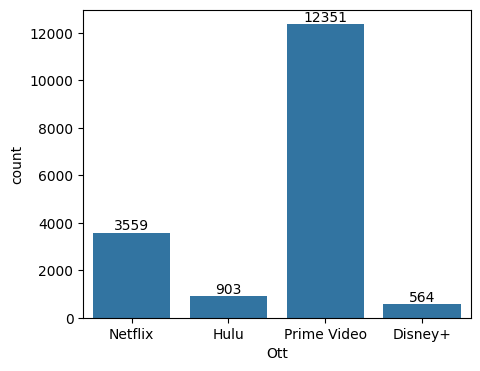

In [154]:
plt.figure(figsize=(5,4))
c=sns.countplot(df1,x='Ott')
c.bar_label(c.containers[0])

plt.show()

from the above the prime video has more number of mivie as compared to any other platform

2.

In [155]:
df1['IMDb'].max()

np.float64(9.3)

In [156]:
df.loc[df['IMDb']==df['IMDb'].max(),'Title']

2415                                           Bounty
4243                                   Down,ButNotOut
8155                                     LoveonaLeash
9161     MyNextGuestwithDavidLettermanandShahRukhKhan
11933                                       SquareOne
12032              StevenBanksHomeEntertainmentCenter
Name: Title, dtype: object

**obt**=
the highest rated movie is the Bounty from all the platforms

3.

In [157]:
df['Directors'].value_counts().head(2)

Directors
Unknown        723
Jay Chapman     36
Name: count, dtype: int64

In [158]:
#df.loc[df['Directors']!='Unknown','Directors'].value_counts().idxmax()
df.loc[df['Directors']!='Unknown','Directors'].mode()

0    Jay Chapman
Name: Directors, dtype: object

the highest directed(driector) of movies is Jay chapman

4.

In [159]:
df['Genres'].value_counts().head(15)

Genres
Drama                   1341
Documentary             1229
Comedy                  1040
Comedy,Drama             446
Horror                   436
Drama,Romance            397
Comedy,Drama,Romance     333
Horror,Thriller          297
Comedy,Romance           289
Unknown                  272
Drama,Thriller           222
Thriller                 211
Action,Drama             173
Crime,Drama,Thriller     169
Crime,Drama              149
Name: count, dtype: int64

the highest genres movies are of Drama

6.

In [160]:
df['Age'].value_counts()

Age
Unknown    9389
18+        3473
7+         1461
13+        1255
all         843
16+         320
Name: count, dtype: int64

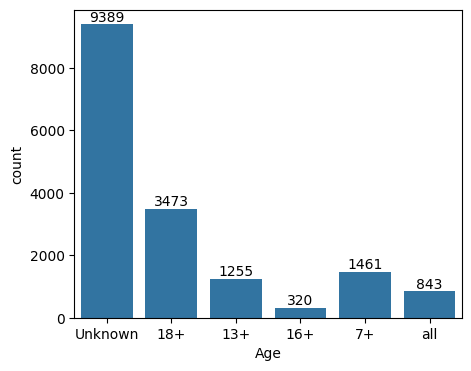

In [161]:
plt.figure(figsize=(5,4))
c=sns.countplot(df,x='Age')
c.bar_label(c.containers[0])
plt.show()

the age restricted movie that are 18+ are more as compared to the the other ages

In [162]:
df

,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language
0,"22AfilmaboutVeterans,HealthcareandSuicide",2018,Unknown,6.1,0,0,1,0,Unknown,Unknown,Unknown,Unknown
1,MomSoHardLive,2019,18+,5.2,0,0,1,0,Brian Volk-Weiss,Comedy,United States,English
2,LoveSwag,2015,13+,5.4,0,0,1,0,Austin Davoren,"Short,Comedy,Drama,Romance",United States,English
3,Rucker50,2016,Unknown,5.3,1,0,0,0,Robert McCullough Jr.,Documentary,United States,English
4,Selfie,2014,Unknown,6.1,1,0,0,0,Cristina Jacob,Comedy,Romania,Romanian
...,...,...,...,...,...,...,...,...,...,...,...,...
16736,okFilimHareketlerBunlar,2010,Unknown,4.3,1,0,0,0,Ozan Açiktan,Comedy,Turkey,Turkish
16737,ldrBeniSevgilim,2019,Unknown,4.5,1,0,0,0,Senol Sönmez,"Comedy,Romance",Turkey,Turkish
16738,ncirReeli2,2014,13+,6.1,1,0,0,0,Aytaç Agirlar,"Drama,Romance",Turkey,Turkish
16739,2,2018,Unknown,3.8,1,0,0,0,Unknown,Unknown,Unknown,Unknown


In [163]:
df1.pivot_table(index='Age',columns='Ott',values='Title',aggfunc='count',
                margins=True)

Ott,Disney+,Hulu,Netflix,Prime Video,All
Age,,,,,
13+,40,119,383,819,1361
16+,1,17,89,226,333
18+,3,290,752,2611,3656
7+,179,109,322,915,1525
Unknown,64,313,1883,7374,9634
all,277,55,130,406,868
All,564,903,3559,12351,17377


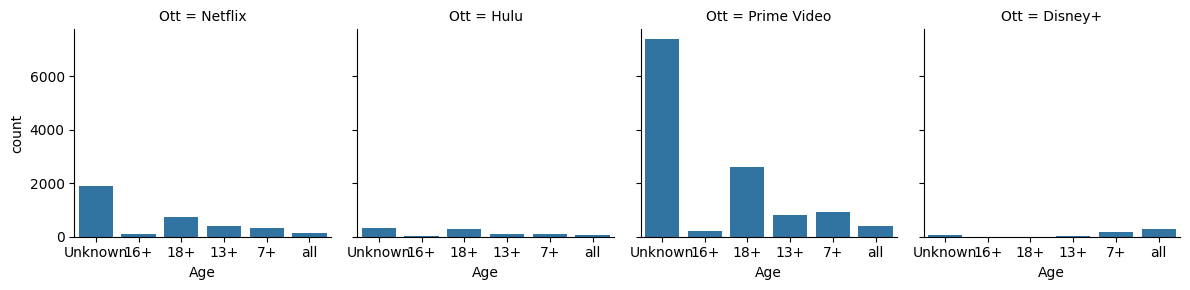

In [164]:
fg=sns.FacetGrid(df1,col='Ott',height=3,aspect=1)
fg.map_dataframe(sns.countplot,x='Age')
plt.show()

in Age-wise movie that 18 + movies are more on the prime video as compared to other platform

new cols like no of genres 
                    langes
                    countries
                    

* get the movies with highest genres

In [165]:
df['Genres'].value_counts().tail(5)

Genres
Drama,Music,Mystery,Romance,Sci-Fi              1
Comedy,Fantasy,Music,Musical,Romance            1
Adventure,Drama,War,Western                     1
Documentary,Music,News                          1
Animation,Short,Comedy,Drama,Fantasy,Musical    1
Name: count, dtype: int64

which movie is avaiable in all 4 platforms

In [166]:
df['platform_count']=df[['Netflix','Hulu','Prime Video','Disney+']].sum(axis=1)
movies_all_4=df[df['platform_count']==4]['Title']
movies_all_4

Series([], Name: Title, dtype: object)

get the movies with highest geners

In [168]:
def count_genres(genres):
    if pd.isna(genres) or genres == '':
        return 0
    return len(genres.split(','))
df['genre_count'] = df['Genres'].apply(count_genres)
highest_genre_movies = df[
    df['genre_count'] == df['genre_count'].max()
][['Title', 'Genres', 'genre_count']]
highest_genre_movies

,Title,Genres,genre_count
5343,"Gappa,theTriphibianMonster","Action,Adventure,Comedy,Drama,Family,Fantasy,H...",9


In [169]:
df1

,Title,Age,IMDb,Ott,avaliablity
3,Rucker50,Unknown,5.3,Netflix,1
4,Selfie,Unknown,6.1,Netflix,1
5,SquadGoals,Unknown,4.0,Netflix,1
6,catsthemewvie,16+,5.2,Netflix,1
7,realityhigh,Unknown,5.2,Netflix,1
...,...,...,...,...,...
66896,Zapped,all,5.1,Disney+,1
66902,ZenonGirlofthe21stCentury,all,6.4,Disney+,1
66903,ZenonTheZequel,all,5.9,Disney+,1
66904,ZenonZ3,all,5.5,Disney+,1


platform wise highest IMDb rating

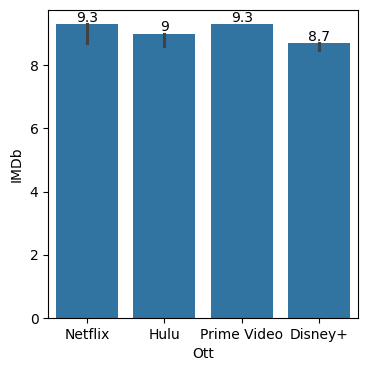

In [170]:
plt.figure(figsize=(4,4))
c=sns.barplot(df1,x='Ott',y='IMDb',estimator='max')
c.bar_label(c.containers[0])

plt.show()

horrer

In [171]:
horror = df[df['Genres'].str.lower() == 'horror']
horror[['Title','Genres']]

,Title,Genres
60,131313,Horror
64,1313HauntedFrat,Horror
65,1313NightoftheWidow,Horror
129,2359,Horror
141,2VoodooAcademy,Horror
...,...,...
16628,YouWillKill,Horror
16704,ZombieIslandMassacre,Horror
16708,ZombieUndead,Horror
16710,Zombiegeddon,Horror


having horrer in genre

In [172]:
ahorror = df[df['Genres'].str.contains('Horror', case=False, na=False)]
ahorror[['Title','Genres']]

,Title,Genres
24,100BloodyAcres,"Comedy,Horror"
25,100Days,"Horror,Romance,Thriller"
29,100GhostStreetTheReturnofRichardSpeck,"Horror,Mystery,Thriller"
55,13Cameras,"Crime,Drama,Horror,Thriller"
56,13Demons,"Horror,Thriller"
...,...,...
16709,ZombieWars,"Horror,Sci-Fi"
16710,Zombiegeddon,Horror
16712,ZombiesAnonymousLastRitesoftheDead,"Comedy,Horror"
16713,ZoneoftheDead,Horror


movies that are having more than  2 languages

In [173]:
def count_languages(lang):
    if pd.isna(lang):
        return 0
    return len(lang.split(','))

df['language_count'] = df['Language'].apply(count_languages)

multi_language_movies = df[df['language_count'] > 2][['Title', 'Language']]
multi_language_movies

,Title,Language
13,AndYourNameIsJonah,"English,American Sign Language,Brazilian Sign ..."
75,1492ConquestofParadise,"Spanish,Latin,Arabic,English"
101,2NightsTillMorning,"English,French,Finnish"
113,2012,"English,French,Tibetan,Mandarin,Russian,Hindi,..."
133,24Hours,"English,Russian,German,Korean,Arabic,Spanish,S..."
...,...,...
16687,Zinda,"Hindi,English,Thai"
16689,ZindagiNaMilegiDobara,"Hindi,Japanese,Spanish,English"
16691,ZionCanyonTreasureoftheGods,"English,Japanese,Korean"
16719,Zubaan,"Hindi,English,Punjabi"
